In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

In [15]:
df = pd.read_csv("news_dataset.csv")

In [16]:
df

,id,headline
0,1,TECH FINANCES GAMES CRYPTO GPU CPU MOVIES MARV...
1,2,10 Tips That Will Make You Influential In TECH...
2,3,How To Get (A) Fabulous TECH FINANCES GAMES CR...
3,4,Here Is A Quick Cure For TECH FINANCES GAMES C...
4,5,Secrets To TECH FINANCES GAMES CRYPTO GPU CPU ...
...,...,...
595,596,The Most (and Least) Effective Ideas In TECH F...
596,597,8 Ways To TECH FINANCES GAMES CRYPTO GPU CPU M...
597,598,When Professionals Run Into Problems With TECH...
598,599,Why It's Easier To Fail With TECH FINANCES GAM...


# Calcula o peso de cada palavra usando um TF-IDF (Term Frequency-  Inverse   Document Frequency
## Aqui, o tfidf_matrix é a matriz que contém cada palavra e sua pontuação TF-IDF em relação a cada documento, ou headline neste caso

In [17]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [19]:
tfidf_matrix = tf.fit_transform(df['headline'])  #  modelo

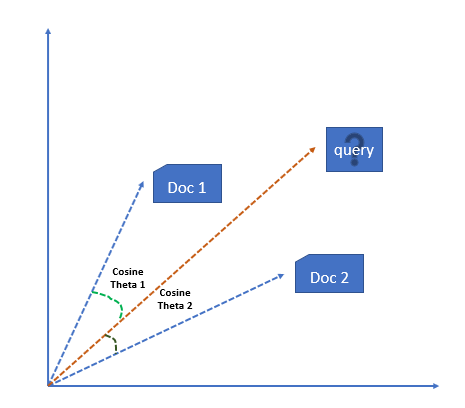
###  O método de cálculo de gostos / desgostos do leitor é calculado tomando o cosseno do ângulo entre o vetor do perfil do usuário  e o vetor do documento; Nesse caso comoo é um dataset, é o ângulo entre dois vetores de documento. Usamos o cosseno porque o valor dele aumentará conforme o ângulo entre os vetores diminui, o que significa mais semelhança  e mais chance  do  usuario achar  atraente.

In [21]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}
for idx, row in df.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
   similar_items = [(cosine_similarities[idx][i], df['id'][i]) for i in similar_indices] 
   results[row['id']] = similar_items[1:]

In [22]:
def item(id):  
  return df.loc[df['id'] == id]['headline'].tolist()[0]

In [23]:
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")
    recs = results[item_id][:num]   
    for rec in recs: 
       print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [29]:
item(599)

"Why It's Easier To Fail With TECH FINANCES GAMES CRYPTO GPU CPU MOVIES MARVEL Than You Might Think"

In [28]:
recommend(599, 2)

Recommending 2 products similar to Why It's Easier To Fail With TECH FINANCES GAMES CRYPTO GPU CPU MOVIES MARVEL Than You Might Think...
-------
Recommended: Why Most TECH FINANCES GAMES CRYPTO GPU CPU MOVIES MARVEL Fail (score:0.24735108329570477)
Recommended: TECH FINANCES GAMES CRYPTO GPU CPU MOVIES MARVEL - Not For Everyone (score:0.22926397367920895)
